# Plan-Merging-Project-Sauerbrei-Raatschen
## Notebook for visualising data

### Setting up the project

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
#df = pd.read_csv("./solvers/results.csv")
df = pd.read_csv("./results.csv")
solveddf = df[df['satisfied'] == True]


allSolver = ["IS","PP","CBS-SOC","GICBS-SOC","ICBS-SOC","MCBS-SOC","MICBS-SOC","CBS-MS","GICBS-MS","ICBS-MS","MCBS-MS","MICBS-MS"]
#allSolver = ["CBS-SOC","GICBS-SOC","ICBS-SOC","MCBS-SOC","MICBS-SOC","CBS-MS","GICBS-MS","ICBS-MS","MCBS-MS","MICBS-MS"]
#allSolver = ["IS","PP","ICBS-SOC","ICBS-MS"]

filterSolved = False

In [3]:
#Splitting data by solver 

#Dataframe of sequential planning
spdf = df[df['solver'] == 'IS']

#Dataframe of prioritized planning
ppdf = df[df['solver'] == 'PP']

#Dataframe of cbs
cbsdf = df[df['solver'] == 'CBS-SOC']

singledf= {}

for solver in allSolver:
    singledf[solver] = df[df['solver'] == solver]
    


In [4]:
#Joining data by instance

combineddf = singledf[allSolver[0]].set_index('instance').add_suffix("_"+allSolver[0])

for i in range(1,len(allSolver)):

    combineddf = combineddf.join(singledf[allSolver[i]].set_index('instance').add_suffix('_'+allSolver[i]),lsuffix="",rsuffix="")


## Functions

In [26]:
def plotInstance(instanceName : str, df : pd.DataFrame,dataToPlot :str):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance to analyze
    :param df: Dataframe indexed by instance
    :return: None
    """ 
    
    newdf = df.filter(like = instanceName, axis = 0)
    
    toPlotdf =pd.DataFrame()
    
    keyTable = []
    for i in allSolver:
        if(filterSolved): newdf = newdf[newdf['satisfied'+"_"+i] == True]
        keyTable.append(dataToPlot+"_"+i)
    
    ax = newdf[keyTable].plot.bar(title = dataToPlot+' of all solvers')


def averageValue(instanceName : str,solverName : str, df : pd.DataFrame,dataToPlot: str, iterationNumber = -1):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param solverName: Name of the used solver, e.g. "SP", "PP", "CBS"
    :param df: Dataframe indexed by instance
    :param iterationNumber: (Optional) number of iteration to be looked at
    :return: None
    """ 
    if iterationNumber != -1: instanceName = instanceName+str(iterationNumber)
        
    newdf = df.filter(like = instanceName, axis = 0)
    if(filterSolved): newdf = newdf[newdf['satisfied'+"_"+solverName] == True]
    
    newdf = newdf[dataToPlot+"_"+solverName]
    if newdf.size == 0:
        return 0
    
    return newdf.sum() / newdf.size

def plotScale(instanceName : str, df : pd.DataFrame, dataToPlot: str):
    """
    plot_Instance Plots all the results of all solvers for a specific instance

    :param instanceName: Name of the instance
    :param df: Dataframe indexed by instance
    :return: A list, containing for every solver a dataframe, with the avg_time per iteration
    """ 
    newdf = df.filter(like = instanceName, axis = 0)

    allResults = []
    
    for solver in allSolver:
        solverResult = pd.DataFrame(columns = ['iteration','avg_'+dataToPlot])
        numberOfIterations = len(newdf.filter(like = instanceName,axis = 0)) // len(newdf.filter(like = instanceName+"1.",axis = 0))
        for i in range(1,numberOfIterations+2):
            avg_value = averageValue(instanceName,solver, newdf,dataToPlot, iterationNumber = i)
            if(avg_value == 0): continue
            solverResult = solverResult.append(pd.DataFrame({'iteration':[i],'avg_'+dataToPlot:[avg_value]}),ignore_index=True)
        allResults.append(solverResult)
        
    ax = allResults[0].plot(x='iteration',y='avg_'+dataToPlot,label=allSolver[0])

    for dataNumber in range(1,len(allResults)):
        allResults[dataNumber].plot(ax=ax,x='iteration',y='avg_'+dataToPlot,label=allSolver[dataNumber],figsize=(10,4))
    ax.set_ylabel("Average " + dataToPlot + " value")
    ax.set_title(instanceName)
        
    
    return ax
    

    

#plotInstance("X5Y5R5RB5", combineddf,"makespan")
#print(averageValue("X3Y3R","IS", combineddf,"exec_time", iterationNumber = 1))
#filterSolved = False
#dataOfThePlot = plotScale("X5Y5R5RB",combineddf, "exec_time")
#dataOfThePlot.set_ylim([0, 7])
#filterSolved = False
#dataOfThePlot = plotScale("X5Y5R5RB",combineddf, "satisfied")
#averageValue("X5Y5R5RB","CBS-SOC", combineddf,"satisfied")



In [6]:
def plotAverageInstance(instanceName, df, dataToPlot):
    filtereddf = df.filter(like = instanceName, axis = 0)
    
    newdf = pd.DataFrame({'solver':[],'avg_'+dataToPlot:[]})
    singledf[allSolver[0]].set_index('instance')
    
    for i in allSolver:
        aValue = averageValue(instanceName,i, filtereddf,dataToPlot)
        #print(i,aValue)
        newdf = newdf.append(pd.DataFrame({'solver':[i],'avg_'+dataToPlot:[aValue]}),ignore_index = True)
    newdf.set_index('solver').plot.bar()

filterSolved = False


#plotAverageInstance("X5Y5R5RB6",combineddf,"makespan")

    
    

### Plotting data

<AxesSubplot:title={'center':'Exec_time for cbs'}, xlabel='instance'>

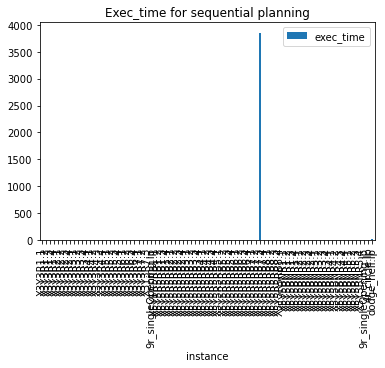

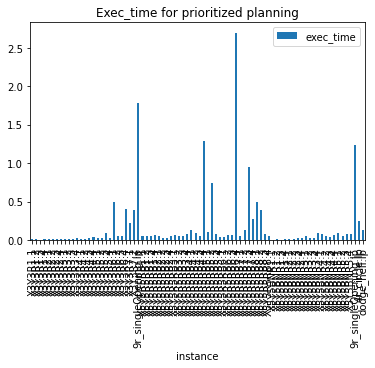

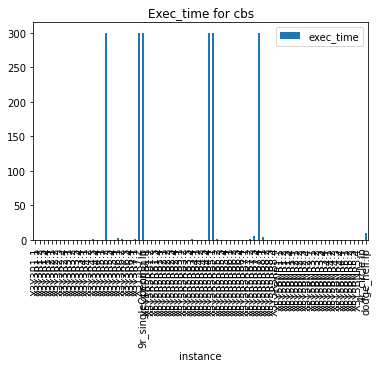

In [7]:
spdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for sequential planning')
ppdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for prioritized planning')
cbsdf[['instance','exec_time']].plot.bar( x = 'instance', title = 'Exec_time for cbs')

<AxesSubplot:title={'center':'Exec_time of all solvers'}, xlabel='instance'>

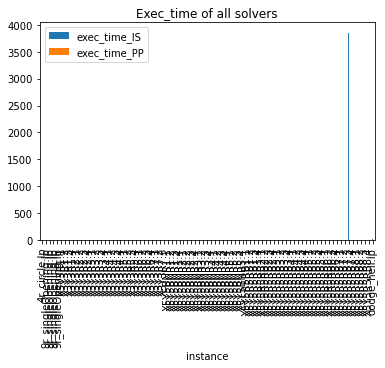

In [8]:
combineddf[['exec_time_IS','exec_time_PP' ]].plot.bar(title = 'Exec_time of all solvers')

## CBS - Data

X5Y5R5RB : Instance the size 5x5 with 5 agents and per iteration one extra wall randomly placed, with every goal reachable by an agent, per iteration 4 instances in total

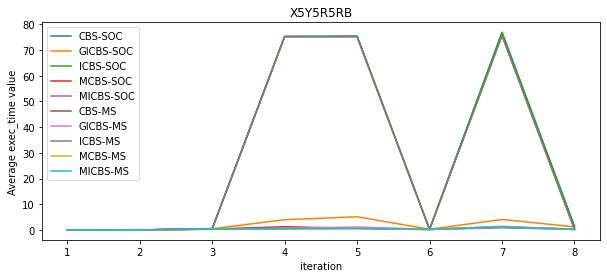

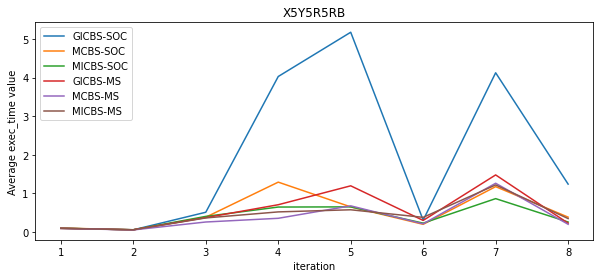

In [38]:
allSolver = ["CBS-SOC","GICBS-SOC","ICBS-SOC","MCBS-SOC","MICBS-SOC","CBS-MS","GICBS-MS","ICBS-MS","MCBS-MS","MICBS-MS"]
filterSolved = False
dataOfThePlot = plotScale("X5Y5R5RB",combineddf, "exec_time")

#Slow
allSolver = ["CBS-SOC","ICBS-SOC","CBS-MS","ICBS-MS"]
#Fast
allSolver = ["GICBS-SOC","MCBS-SOC","MICBS-SOC","GICBS-MS","MCBS-MS","MICBS-MS"]
filterSolved = False
dataOfThePlot = plotScale("X5Y5R5RB",combineddf, "exec_time")

